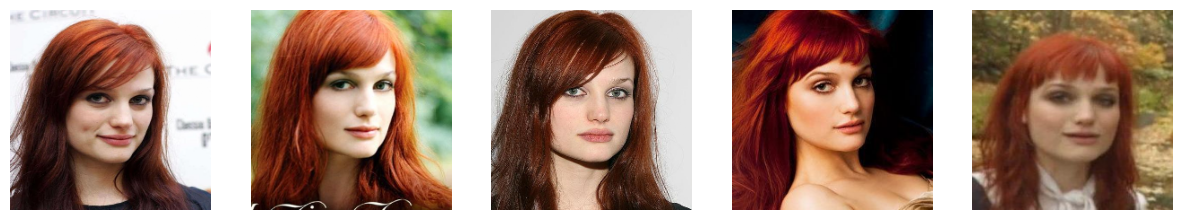

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 128)    5

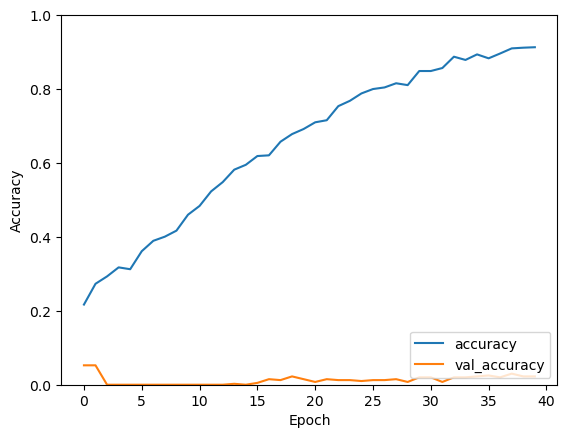

1/1 [==============================] - 0s 69ms/step
The similarity score between the images is: 0.96


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from scipy.spatial.distance import cosine

# Step 1: Load and Preprocess Data
def load_images_and_labels(directory, max_images=2000, size=(224, 224)):
    images = []
    labels = []
    count = 0
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        for image in os.listdir(folder_path):
            if count >= max_images:
                break
            image_path = os.path.join(folder_path, image)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, size)
            images.append(img)
            labels.append(folder)
            count += 1
        if count >= max_images:
            break
    images = np.array(images, dtype='float32') / 255.0
    labels = LabelEncoder().fit_transform(labels)
    labels = to_categorical(labels)
    return images, labels

# Step 2: Display Preprocessed Images
def display_images(images, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Load images and labels
images, labels = load_images_and_labels('C:/Users/UseR/Thesis/VggFaces/train')
display_images(images, 5)

# Step 3: Build and Compile the CNN Model
def build_model(num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu', name='penultimate_layer'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = labels.shape[1]
model = build_model(num_classes)
model.summary()

# Step 4: Train the Model
history = model.fit(images, labels, epochs=40, batch_size=32, validation_split=0.2)

# Optional: Display training progress
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Create a new model for feature extraction
feature_model = Model(inputs=model.input, outputs=model.get_layer('penultimate_layer').output)

# Function to extract features and calculate similarity
def extract_features(image_path, model, size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize the image
    features = model.predict(img)
    return np.squeeze(features)  # Ensure output is 1-D

def calculate_similarity(features1, features2):
    return 1 - cosine(features1, features2)

def test_similarity(image_path1, image_path2, feature_model):
    features1 = extract_features(image_path1, feature_model)
    features2 = extract_features(image_path2, feature_model)
    similarity_score = calculate_similarity(features1, features2)
    return similarity_score

# Paths to the images you want to compare
image_path1 = 'C:/Users/UseR/Thesis/VggFaces/train/n000002/0038_01.jpg'
image_path2 = 'C:/Users/UseR/Thesis/VggFaces/train/n000002/0076_01.jpg'

# Calculate the similarity between two images
similarity_score = test_similarity(image_path1, image_path2, feature_model)
print(f"The similarity score between the images is: {similarity_score:.2f}")


In [2]:
# Paths to the images you want to compare
image_path1 = 'C:/Users/UseR/Thesis/VggFaces/train/n000002/0038_01.jpg'
image_path2 = 'C:/Users/UseR/Thesis/VggFaces/train/n000011/0015_01.jpg'

# Calculate the similarity between two images
similarity_score = test_similarity(image_path1, image_path2, feature_model)
print(f"The similarity score between the images is: {similarity_score:.2f}")

1/1 [==============================] - 0s 67ms/step
The similarity score between the images is: 0.28


In [3]:
# Paths to the images you want to compare
image_path1 = 'C:/Users/UseR/Thesis/VggFaces/train/n000004/0006_01.jpg'
image_path2 = 'C:/Users/UseR/Thesis/VggFaces/train/n000118/0005_01.jpg'

# Calculate the similarity between two images
similarity_score = test_similarity(image_path1, image_path2, feature_model)
print(f"The similarity score between the images is: {similarity_score:.2f}")

1/1 [==============================] - 0s 72ms/step
The similarity score between the images is: 0.37


In [4]:
# Paths to the images you want to compare
image_path1 = 'C:/Users/UseR/Thesis/VggFaces/train/n000023/0003_01.jpg'
image_path2 = 'C:/Users/UseR/Thesis/VggFaces/train/n000051/0003_02.jpg'

# Calculate the similarity between two images
similarity_score = test_similarity(image_path1, image_path2, feature_model)
print(f"The similarity score between the images is: {similarity_score:.2f}")

1/1 [==============================] - 0s 65ms/step
The similarity score between the images is: 0.46


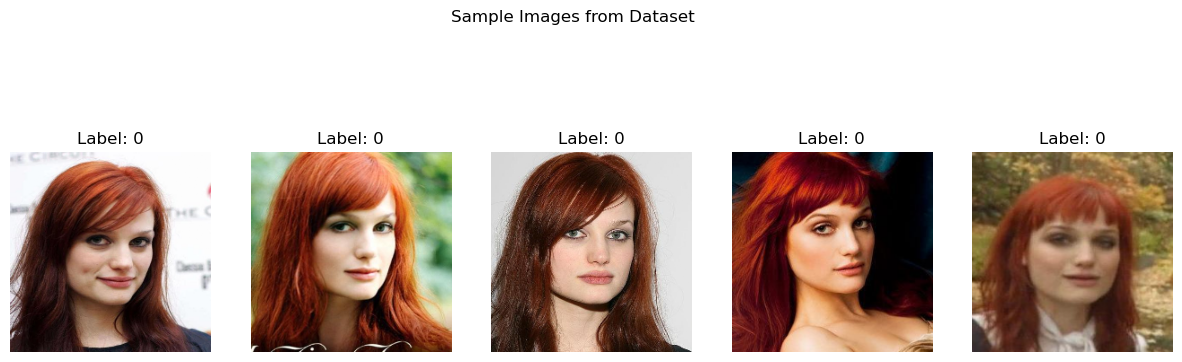

In [5]:
def display_sample_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {np.argmax(labels[i])}')
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()

# Assuming 'images' and 'labels' are already loaded
display_sample_images(images, labels)


In [21]:
from tensorflow.keras.utils import plot_model

def visualize_model(model, file_path='model_architecture.png'):
    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=True)

# Assuming 'model' is already defined
visualize_model(model)


AttributeError: module 'pydot' has no attribute 'InvocationException'

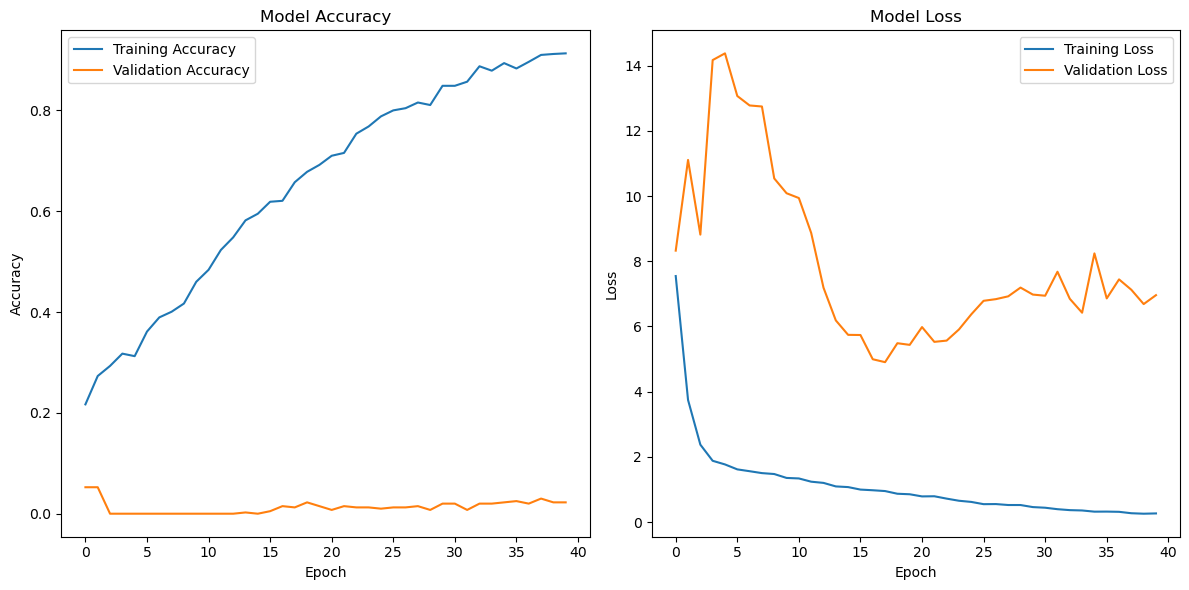

In [8]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming 'history' is the result of the fit method
plot_training_history(history)


1/1 [==============================] - 0s 39ms/step


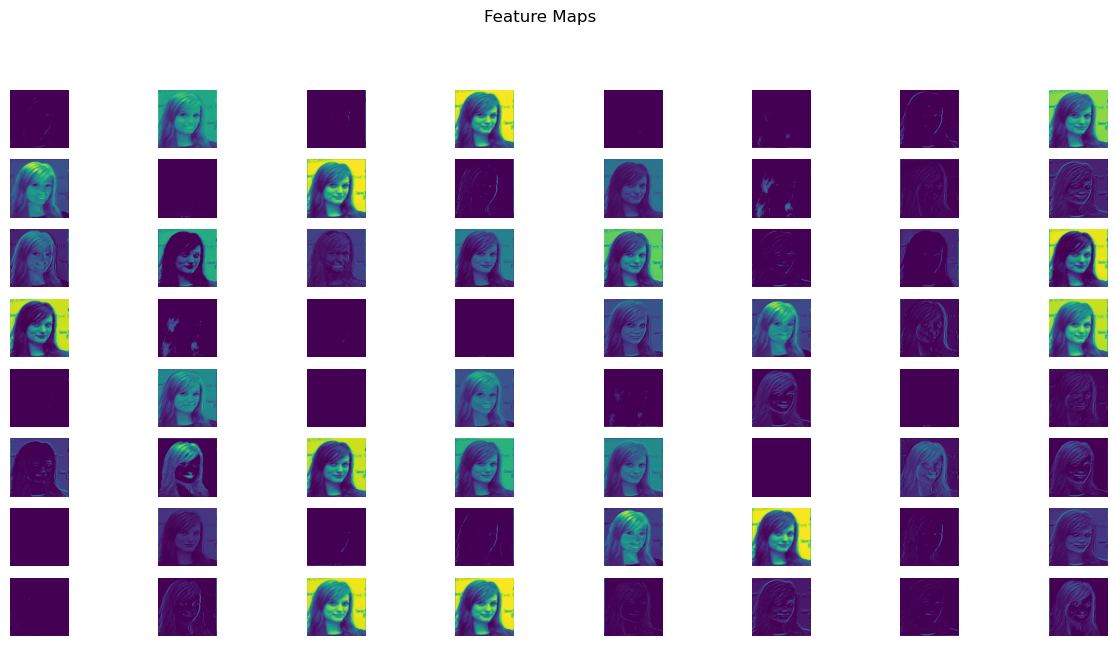

In [9]:
from tensorflow.keras.models import Model

def visualize_feature_maps(model, image, layer_name='conv2d'):
    model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    features = model.predict(image[np.newaxis, ...])
    
    plt.figure(figsize=(15, 8))
    for i in range(features.shape[-1]):  # assuming the feature map has multiple channels
        ax = plt.subplot(features.shape[-1] // 8 + 1, 8, i + 1)
        plt.imshow(features[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle('Feature Maps')
    plt.show()

# Example usage
visualize_feature_maps(model, images[0])  # Assuming 'images[0]' is a preprocessed image from your dataset


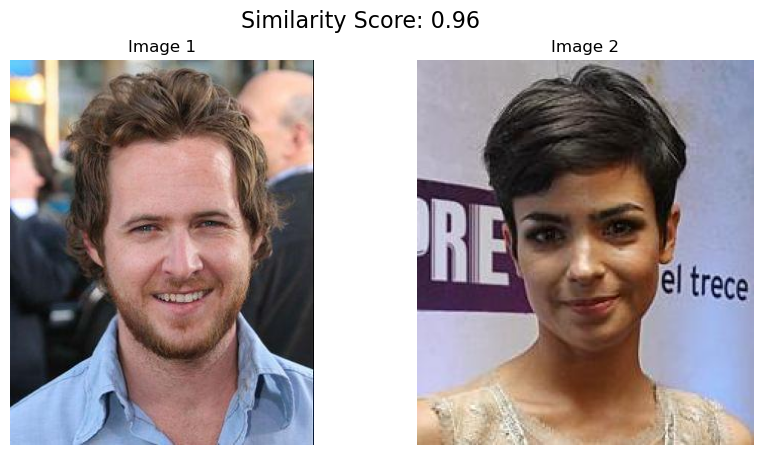

In [11]:
# Paths to the images you want to compare
image_path1 = 'C:/Users/UseR/Thesis/VggFaces/train/n000004/0006_01.jpg'
image_path2 = 'C:/Users/UseR/Thesis/VggFaces/train/n000118/0005_01.jpg'

def display_similarity(image_path1, image_path2, similarity_score):
    img1 = cv2.imread(image_path1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(image_path2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title('Image 2')
    plt.axis('off')

    plt.suptitle(f'Similarity Score: {similarity_score:.2f}', size=16)
    plt.show()

# Assuming you have calculated the similarity score already
display_similarity(image_path1, image_path2, similarity_score)


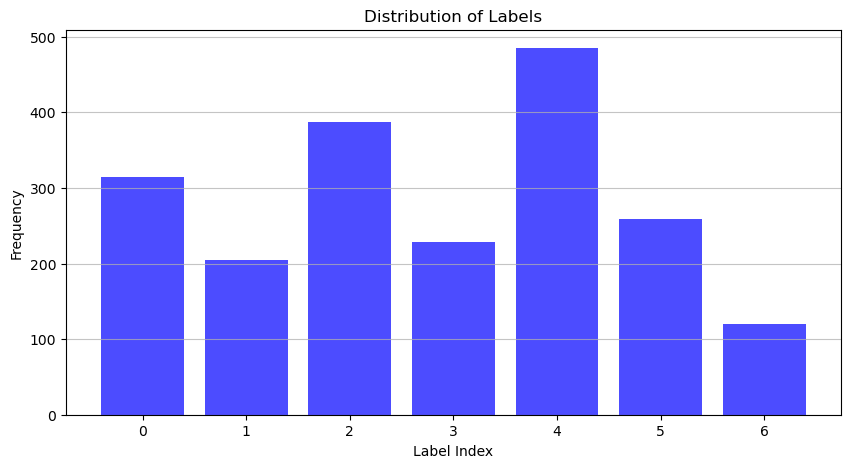

In [12]:
def plot_label_distribution(labels):
    # Assuming labels are already one-hot encoded and can be converted back to single labels
    label_indices = np.argmax(labels, axis=1)
    plt.figure(figsize=(10, 5))
    plt.hist(label_indices, bins=np.arange(len(np.unique(label_indices)) + 1) - 0.5, rwidth=0.8, color='blue', alpha=0.7)
    plt.title('Distribution of Labels')
    plt.xlabel('Label Index')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_label_distribution(labels)


In [20]:
def plot_feature_correlations(features):
    # Assuming 'features' is a 2D numpy array where each row is a feature vector
    correlation_matrix = np.corrcoef(features.T)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title('Correlation Matrix of Features')
    plt.show()

# You need to extract features for multiple images and stack them into a matrix
# Here's a pseudo-call assuming you have a function to get features for multiple images
features_matrix = np.array([extract_features(image, feature_model) for image in images[:100]])
plot_feature_correlations(features_matrix)


TypeError: Can't convert object to 'str' for 'filename'

In [19]:
from sklearn.manifold import TSNE

def visualize_tsne(features, labels, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=123)
    tsne_results = tsne.fit_transform(features)
    
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=np.argmax(labels, axis=1), cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('t-SNE visualization of Features')
    plt.xlabel('t-SNE-1')
    plt.ylabel('t-SNE-2')
    plt.show()

# Use the pseudo-code example to extract features and apply this function
visualize_tsne(features_matrix, labels[:100])


NameError: name 'features_matrix' is not defined

63/63 [==============================] - 23s 359ms/step


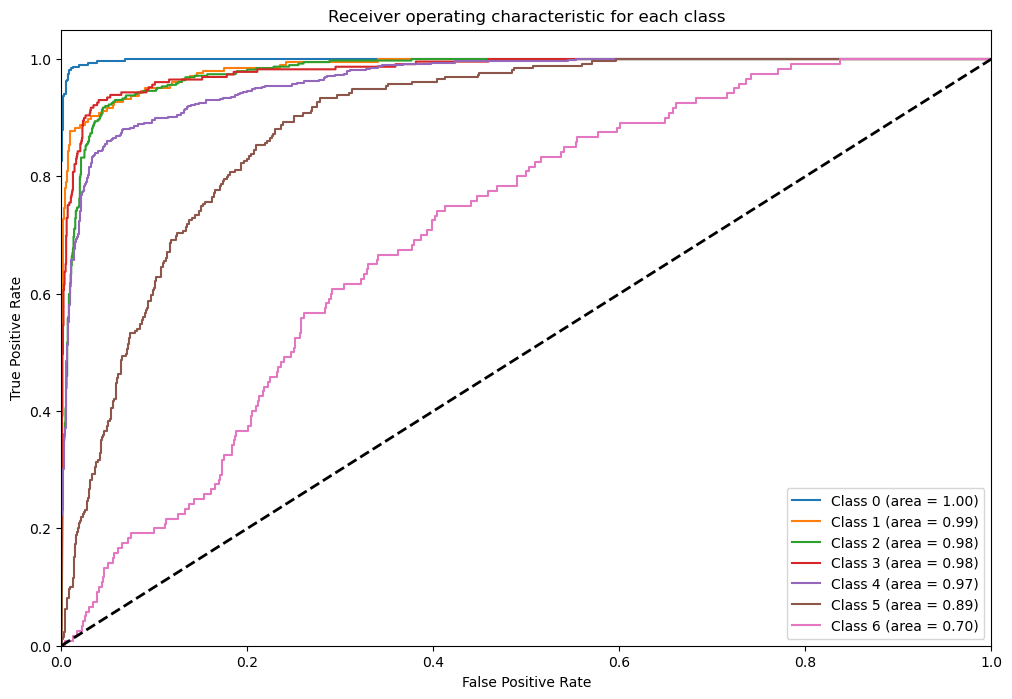

In [18]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(labels, predictions, num_classes):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(12, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for each class')
    plt.legend(loc="lower right")
    plt.show()

# Assuming you have predictions from your model
plot_roc_curve(labels, model.predict(images), num_classes=num_classes)
